# COLOR QUANTIZATION USING KMEANS

### Source code

In [36]:
from PIL import Image
from sklearn.metrics import pairwise_distances_argmin
from operator import add
import numpy as np
import sys

class ImageCompressor:
    
    #constructor
    #image: image which needs to be compressed
    #bits_code: determines size of codebook e.g. 8 bit codebook, 12 bit codebook etc
    def __init__(self, image, bits_code):
        self.image = Image.open(image)
        
        self.bits_code = bits_code
        self.image_to_imageVector() #converts the image into pixel vector
    
    #converts the image into pixel vector
    def image_to_imageVector(self):
        arr = np.array(self.image)
        w, h, d = arr.shape
        self.image_shape = arr.shape
        self.N = w * h
        self.imageVector = arr.reshape((w * h), d)
        

    #prepares the codebook
    def prepare_codebook(self, n_iter = 1):
        codebook_size = 2 ** self.bits_code #size of codebook
        
        #randomly initialzing the codebook
        self.codebook = np.random.randint(255, size = codebook_size * 3, dtype = 'uint8').reshape(codebook_size, 3)
  

        while n_iter != 0:
            #assign cluster to each pixel
            labels = pairwise_distances_argmin(self.imageVector,
                                              self.codebook)


            #update cluster centroids
            for i in range(codebook_size):
                centroid_i_sum = [0, 0, 0]
                count = 0
                for j in range(self.N):
                    if labels[j] == i:
                        centroid_i_sum = list(map(add, centroid_i_sum, self.imageVector[j]))
                        count += 1

                if count != 0:
                    centroid_i = np.array(centroid_i_sum) / count
                    self.codebook[i] = centroid_i
            n_iter -= 1


    
    #get the label for each pixel in the original iamge using codebook
    def compress(self):
        self.labelVector = pairwise_distances_argmin(self.imageVector,
                                          self.codebook)

    #reconstruct image using codebook and labels assigned
    def reconstruct_image(self):
        self.reconstructedImageVector = self.codebook[self.labelVector]
        self.reconstructed_image = Image.fromarray(self.reconstructedImageVector.reshape(self.image_shape))
        

# Compressing image using 8 bit codebook

### compressing image using 8 bit codebook

In [37]:
ic = ImageCompressor('pp_2.jpeg', 8)
ic.prepare_codebook(n_iter = 1)
ic.compress()

### Size of codebook and compressed image

In [38]:
print('Size of codebook(in bytes): ', ic.codebook.size)
print('Size of compressed image(in bytes): ', ic.labelVector.size)

Size of codebook(in bytes):  768
Size of compressed image(in bytes):  102400


### Reconstructing image using the codebook

In [39]:
ic.reconstruct_image()

### Displaying original image and the reconstructed image

Original image


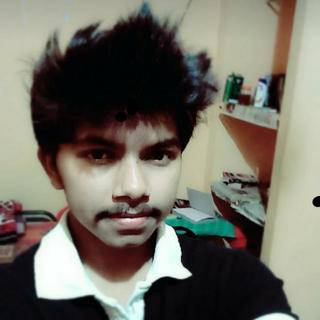

In [52]:
print('Original image')
ic.image

Reconstructed image


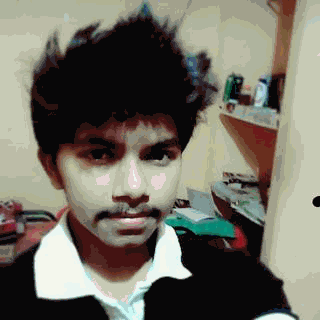

In [51]:
print('Reconstructed image')
ic.reconstructed_image

### Size of original image and reconstructed image

In [41]:
print('Size of original image(in bytes): ', ic.imageVector.size)
print('Size of reconstructed image(in bytes): ', ic.reconstructedImageVector.size)

Size of original image(in bytes):  307200
Size of reconstructed image(in bytes):  307200


# Compressing Image using 12 bit codebook

### compressing image using 12 bit codebook

In [55]:
ic = ImageCompressor('pp_2.jpeg', 12)
ic.prepare_codebook(n_iter = 1)
ic.compress()

### Size of codebook and compressed image

In [57]:
print('Size of codebook(in bytes): ', ic.codebook.size)
print('Size of compressed image(in bytes): ', ic.labelVector.size)

Size of codebook(in bytes):  12288
Size of compressed image(in bytes):  102400


### Reconstructing image using the codebook

In [59]:
ic.reconstruct_image()

### Displaying original image and the reconstructed image

Original image


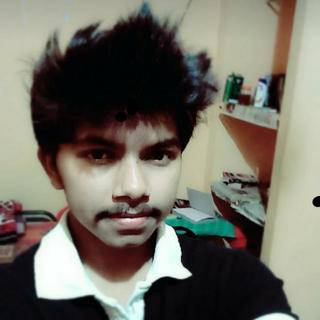

In [61]:
print('Original image')
ic.image

Reconstructed image


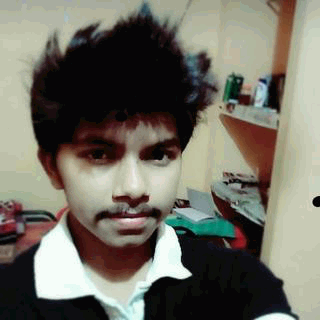

In [62]:
print('Reconstructed image')
ic.reconstructed_image

### Size of original image and reconstructed image

In [64]:
print('Size of original image(in bytes): ', ic.imageVector.size)
print('Size of reconstructed image(in bytes): ', ic.reconstructedImageVector.size)

Size of original image(in bytes):  307200
Size of reconstructed image(in bytes):  307200


# Compressing Image using 16 bit codebook

### compressing image using 16 bit codebook

In [ ]:
ic = ImageCompressor('pp_2.jpeg', 16)
ic.prepare_codebook(n_iter = 1)
ic.compress()

### Size of codebook and compressed image

In [ ]:
print('Size of codebook(in bytes): ', ic.codebook.size)
print('Size of compressed image(in bytes): ', ic.labelVector.size)

### Reconstructing image using the codebook

In [ ]:
ic.reconstruct_image()

### Displaying original image and the reconstructed image

In [ ]:
print('Original image')
ic.image

In [ ]:
print('Reconstructed image')
ic.reconstructed_image

### Size of original image and reconstructed image

In [ ]:
print('Size of original image(in bytes): ', ic.imageVector.size)
print('Size of reconstructed image(in bytes): ', ic.reconstructedImageVector.size)

## Note: For 16 bit codebook, it was taking too long to execute, that is why outputs are missing